In [1]:
from media_impact_monitor.events import get_events, EventSearch
from media_impact_monitor.fulltexts import get_fulltexts, FulltextSearch
from datetime import date
from tqdm.auto import tqdm
import pandas as pd
import matplotlib.pyplot as plt

events = get_events(
    EventSearch(source="acled", start_date=date(2024, 4, 1), end_date=date(2024, 6, 30))
)
events = events.sample(200, random_state=0)


In [2]:
events["fulltexts"] = None
for event in tqdm(events.itertuples(), total=len(events)):
    fulltexts = await get_fulltexts(
        FulltextSearch(media_source="news_online", event_id=event.event_id)
    )
    events.at[event.Index, "fulltexts"] = len(fulltexts) if fulltexts is not None else 0
(events["fulltexts"] == 0).value_counts()


  0%|          | 0/200 [00:00<?, ?it/s]

fulltexts
True     164
False     36
Name: count, dtype: int64

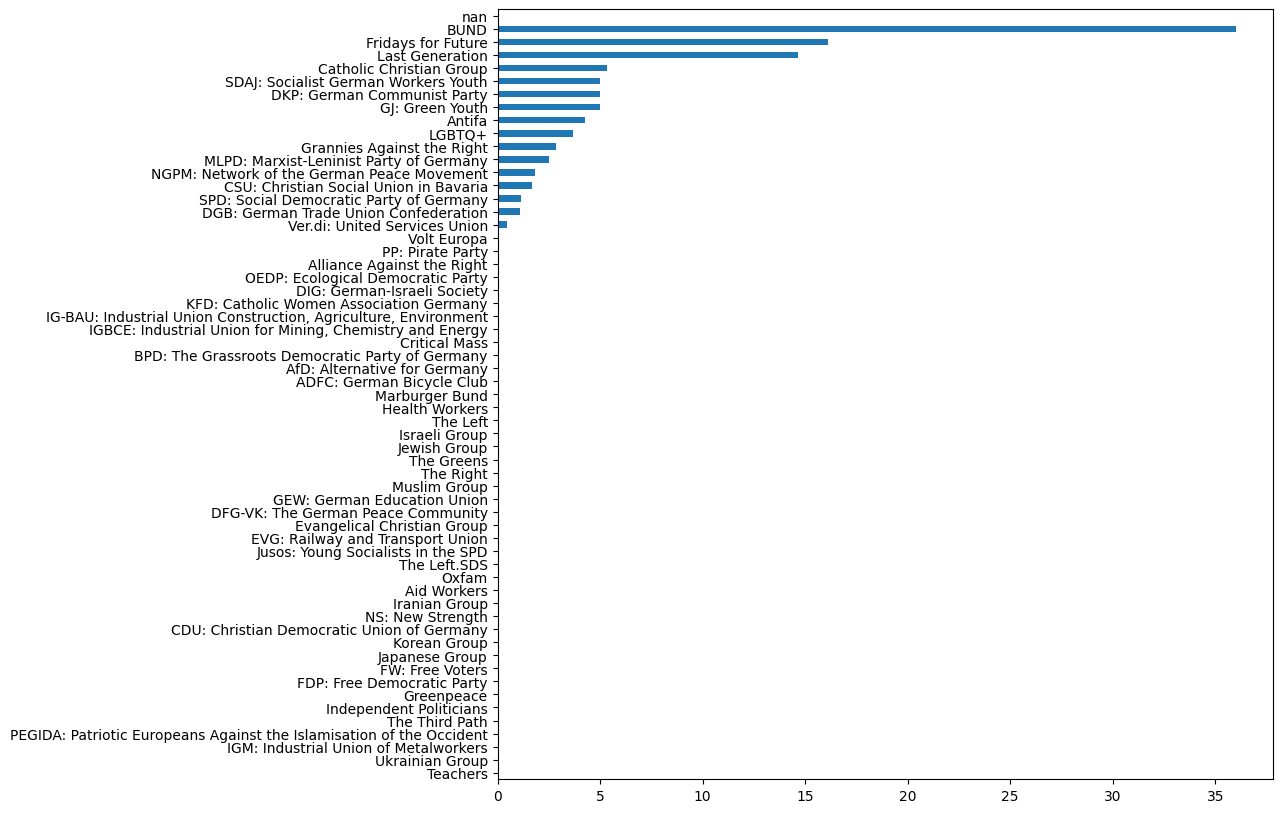

In [3]:
mean_articles = {
    org: events[events.organizers.apply(lambda x: org in x)].fulltexts.mean()
    for org in events["organizers"].explode().unique()
}
mean_articles = pd.Series(mean_articles)
mean_articles = mean_articles.sort_values(ascending=True)
mean_articles.plot(kind="barh", figsize=(10, 10))
plt.show()
